In [233]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [234]:
df = pd.read_csv('global_laptop_selling_data.csv')

In [235]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [236]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [237]:
df = df.drop('laptop_ID', axis=1)

In [238]:
df.head() # y = df[['Price_euros']]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Preprocessing

In [239]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [240]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.2+ KB


In [242]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [243]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [244]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)


Text(0.5, 1.0, 'Average Price Per Company')

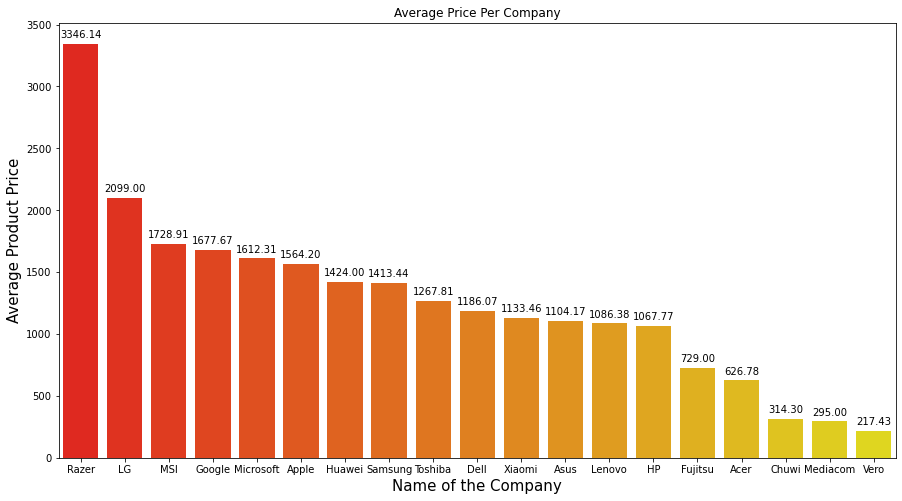

In [245]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

# Keep Continue for Regression Model

In [246]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


# Encodig

In [247]:
from sklearn.preprocessing import LabelEncoder

In [248]:
le=LabelEncoder()

In [249]:
df['TypeName']=le.fit_transform(df['TypeName'])

In [250]:
df['Company']=le.fit_transform(df['Company'])

In [251]:
df['OpSys']=le.fit_transform(df['OpSys'])

In [252]:
df['ScreenResolution']=le.fit_transform(df['ScreenResolution'])

In [253]:
df['Memory']=le.fit_transform(df['Memory'])

In [254]:
df['Gpu']=le.fit_transform(df['Gpu'])

In [255]:
df['Cpu']=le.fit_transform(df['Cpu'])

In [256]:
df['Product']=le.fit_transform(df['Product'])

# Scaling

In [257]:
from sklearn.preprocessing import MaxAbsScaler

In [258]:
mas=MaxAbsScaler()

In [259]:
df['Cpu']=mas.fit_transform(df[['Cpu']])

In [260]:
df['Gpu']=mas.fit_transform(df[['Gpu']])

In [261]:
df['Product']=mas.fit_transform(df[['Product']])

In [262]:
df.Company.nunique()

19

In [263]:
df.Inches.nunique()

18

In [264]:
df.Ram.nunique()

9

In [265]:
df.Product.nunique()

618

In [266]:
df.OpSys.nunique()

9

In [267]:
df.TypeName.nunique()

6

In [268]:
df.Memory.nunique()

39

In [269]:
df.Product.nunique()

618

In [270]:
df.Cpu.nunique()

118

In [271]:
df.Gpu.nunique()

106

In [272]:
df.ScreenResolution.nunique()

40

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   int32  
 1   Product           1303 non-null   float64
 2   TypeName          1303 non-null   int32  
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   int32  
 5   Cpu               1303 non-null   float64
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   int32  
 8   Gpu               1303 non-null   float64
 9   OpSys             1303 non-null   int32  
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(6), int32(6)
memory usage: 91.7 KB


In [274]:
df.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,0.486224,4,13.3,23,0.555556,8,4,0.533333,8,1.37,1339.69


# Data Separate

In [275]:
x=df.drop('Price_euros',axis=1)
y=df[['Price_euros']]

In [276]:
from sklearn.model_selection import train_test_split as tts

In [277]:
xtrain,xtest,ytrain,ytest=tts(x,y,train_size=70,random_state=1)

# Decision-Tree-Regressor ML Algorithm

In [278]:
from sklearn.tree import DecisionTreeRegressor

In [279]:
dtr=DecisionTreeRegressor()

In [280]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [281]:
dtr.score(xtrain,ytrain)

1.0

In [282]:
dtr.score(xtest,ytest)#Overfiting

0.20175132074286883

# Linear-Regression

In [283]:
from sklearn.linear_model import LinearRegression

In [284]:
lr= LinearRegression()

In [285]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [286]:
lr.score(xtest,ytest)

0.3908502470708183

In [287]:
lr.score(xtrain,ytrain)#Overfiting

0.7397713311159351

# Random-Forest-Regressor

In [288]:
from sklearn.ensemble import RandomForestRegressor

In [289]:
rfr=RandomForestRegressor()

In [290]:
rfr.fit(xtrain,ytrain)

C:\Users\Pritam\AppData\Local\Temp/ipykernel_2416/141750261.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain,ytrain)


RandomForestRegressor()

In [291]:
rfr.score(xtest,ytest)

0.6683586282420739

In [292]:
rfr.score(xtrain,ytrain)#Overfiting

0.9176765501689068

# Support-Vector-Machine(SVM)

In [293]:
from sklearn.svm import SVR

In [294]:
sv=SVR(kernel='linear')

In [295]:
sv.fit(xtrain,ytrain)

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [296]:
sv.score(xtrain,ytrain)

0.42968782198576316

In [297]:
sv.score(xtest,ytest)

0.512450678676743

# KNeighbors-Regressor

In [298]:
from sklearn.neighbors import KNeighborsRegressor

In [299]:
knr=KNeighborsRegressor()

In [300]:
knr.fit(xtrain,ytrain)

KNeighborsRegressor()

In [301]:
knr.score(xtest,ytest)

0.48710650769763053

In [302]:
knr.score(xtrain,ytrain)#bestfit

0.5309300106192901

# Extra-Trees-Regressor

In [303]:
from sklearn.ensemble import ExtraTreesRegressor

In [304]:
etr=ExtraTreesRegressor()

In [305]:
etr.fit(xtrain,ytrain)

C:\Users\Pritam\AppData\Local\Temp/ipykernel_2416/1079151583.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etr.fit(xtrain,ytrain)


ExtraTreesRegressor()

In [306]:
etr.score(xtest,ytest)

0.5589639632994172

In [307]:
etr.score(xtrain,ytrain)#Overfiting

1.0

# Ada-Boost-Regressor

In [308]:
from sklearn.ensemble import AdaBoostRegressor

In [309]:
adbr=AdaBoostRegressor()

In [310]:
adbr.fit(xtrain,ytrain)

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor()

In [311]:
adbr.score(xtest,ytest)

0.5951591387120841

In [312]:
adbr.score(xtrain,ytrain)#Overfit

0.8918742788457609

# Gradient-Boosting-Regressor

In [313]:
from sklearn.ensemble import GradientBoostingRegressor

In [314]:
gbr=GradientBoostingRegressor()

In [315]:
gbr.fit(xtrain,ytrain)

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [316]:
gbr.score(xtrain,ytrain)

0.9973191990319831

In [317]:
gbr.score(xtest,ytest)

0.6496534044936295

# xgboost

In [318]:
import xgboost as xg

In [319]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10)

In [321]:
xgb_r.fit(xtrain,ytrain)

[19:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [322]:
xgb_r.score(xtest,ytest)

0.5914948640255492

In [323]:
xgb_r.score(xtrain,ytrain)

0.9613343039068278

# The End